In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [13]:
!git pull origin master

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/invite-you/simplified_rbox_cnn
 * branch            master     -> FETCH_HEAD
   9a447df..edef456  master     -> origin/master
Updating 9a447df..edef456
Fast-forward
 create_dataset.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)


In [2]:
!git clone https://github.com/invite-you/simplified_rbox_cnn.git

Cloning into 'simplified_rbox_cnn'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 355 (delta 86), reused 331 (delta 72), pack-reused 0
Receiving objects: 100% (355/355), 4.42 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [3]:
cd simplified_rbox_cnn

/content/simplified_rbox_cnn


In [4]:
ls -atl "/content/gdrive/My Drive/findShip/images"

^C


In [27]:
!python create_dataset.py --src_dir "/content/gdrive/My Drive/findShip" --dst_path "/content/gdrive/My Drive/findShip/tfrecords/test_40p_w_img_only_pos.tfrecords"

Traceback (most recent call last):
  File "create_dataset.py", line 9, in <module>
    import numpy as np
  File "/usr/local/lib/python3.6/dist-packages/numpy/__init__.py", line 150, in <module>
    from . import random
  File "/usr/local/lib/python3.6/dist-packages/numpy/random/__init__.py", line 181, in <module>
    from . import _pickle
  File "/usr/local/lib/python3.6/dist-packages/numpy/random/_pickle.py", line 1, in <module>
    from .mtrand import RandomState
  File "<frozen importlib._bootstrap>", line 416, in parent
KeyboardInterrupt


In [25]:
!python create_dataset.py --src_dir "/content/gdrive/My Drive/findShip" --dst_path "/content/gdrive/My Drive/findShip/tfrecords/test_40p_w_neg_img_only_pos.tfrecords" --is_include_only_pos


100% 308/308 [02:33<00:00,  2.15it/s]
N of TFRecords: 1592


In [26]:
ls -alth "/content/gdrive/My Drive/findShip/tfrecords/"

total 22G
-rw------- 1 root root 1.3G Jan 23 00:20 test_40p_w_neg_img_only_pos.tfrecords
-rw------- 1 root root  16G Jan 22 15:41 test.tfrecord
-rw------- 1 root root 5.1G Jan 22 07:10 train_40p_w_neg_img_only_pos.tfrecords


In [28]:
import io
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from google.colab.patches import cv2_imshow

# feature를 묘사하는 dictionary를 생성합니다.
image_feature_description = {
    'image/encoded': tf.FixedLenFeature((), tf.string, default_value=''),
    'image/format': tf.FixedLenFeature((), tf.string, default_value='png'),
    'image/filename': tf.FixedLenFeature((), tf.string, default_value=''),
    'image/height': tf.FixedLenFeature((), tf.int64, 1),
    'image/width': tf.FixedLenFeature((), tf.int64, 1),
                
    # Object rotated boxes.
    'image/object/rbbox/cy': tf.VarLenFeature(tf.float32),
    'image/object/rbbox/cx': tf.VarLenFeature(tf.float32),
    'image/object/rbbox/h': tf.VarLenFeature(tf.float32),
    'image/object/rbbox/w': tf.VarLenFeature(tf.float32),
    'image/object/rbbox/ang': tf.VarLenFeature(tf.float32),

    # Object classes.
    'image/object/class/label': tf.VarLenFeature(tf.int64),
    #'image/object/class/text': tf.FixedLenFeature((), tf.string, default_value=''),
}

def _parse_image_function(example_proto):
  # tf.Example을 parsing합니다.
  return tf.parse_single_example(example_proto, image_feature_description)

filename = "/content/gdrive/My Drive/findShip/tfrecords/test_40p_w_neg_img_only_pos.tfrecords"
# tf.data.TFRecordDataset을 생성합니다.
raw_image_dataset = tf.data.TFRecordDataset(filename)
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
print(parsed_image_dataset)

# tf.data.TFRecordDataset을 iterator로 돌면서 이미지를 화면에 출력합니다.
iterator = parsed_image_dataset.make_one_shot_iterator()
next_element = iterator.get_next()


# InteractiveSession을 엽니다.
sess = tf.InteractiveSession()


<DatasetV1Adapter shapes: {image/object/class/label: (?,), image/object/rbbox/ang: (?,), image/object/rbbox/cx: (?,), image/object/rbbox/cy: (?,), image/object/rbbox/h: (?,), image/object/rbbox/w: (?,), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/width: ()}, types: {image/object/class/label: tf.int64, image/object/rbbox/ang: tf.float32, image/object/rbbox/cx: tf.float32, image/object/rbbox/cy: tf.float32, image/object/rbbox/h: tf.float32, image/object/rbbox/w: tf.float32, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/width: tf.int64}>


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


[ 84.09529 426.92407] [663.5536  252.09747] [ 52.016994 209.75443 ] [265.64435 697.57336] [-0.85065174 -0.879046  ]
a
84.09529 663.5536 52.016994 265.64435 -0.85065174
-48.72688293457031 637.5450916290283 216.91746520996094 689.5620861053467


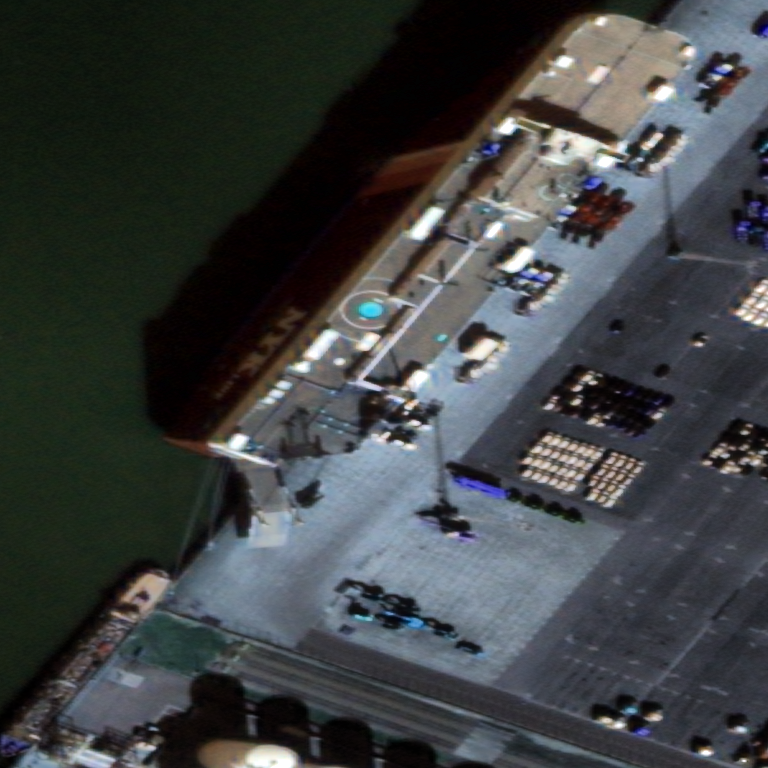

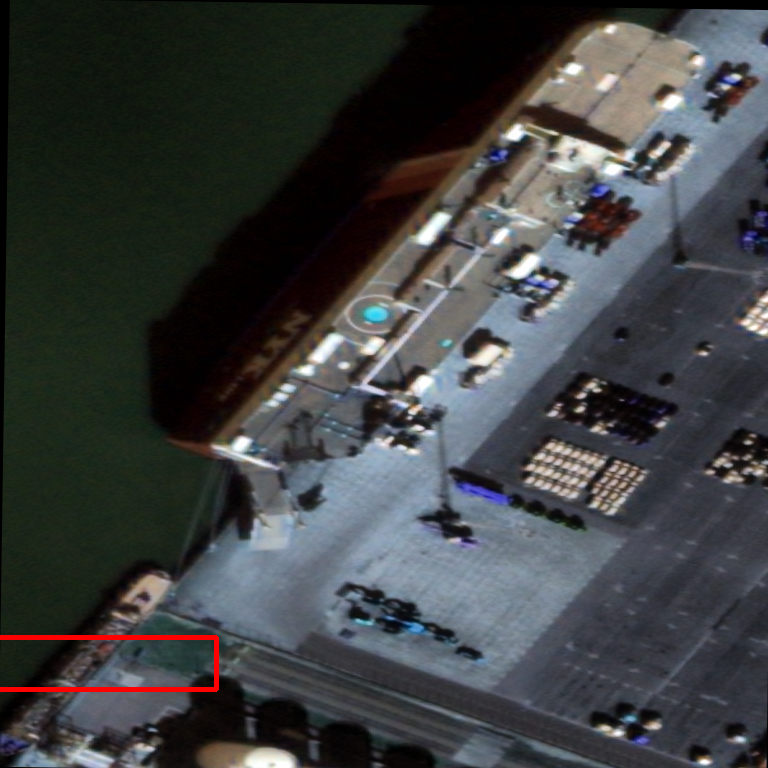

426.92407 252.09747 209.75443 697.57336 -0.879046
78.13739013671875 147.2202606201172 775.7107543945312 356.9746856689453


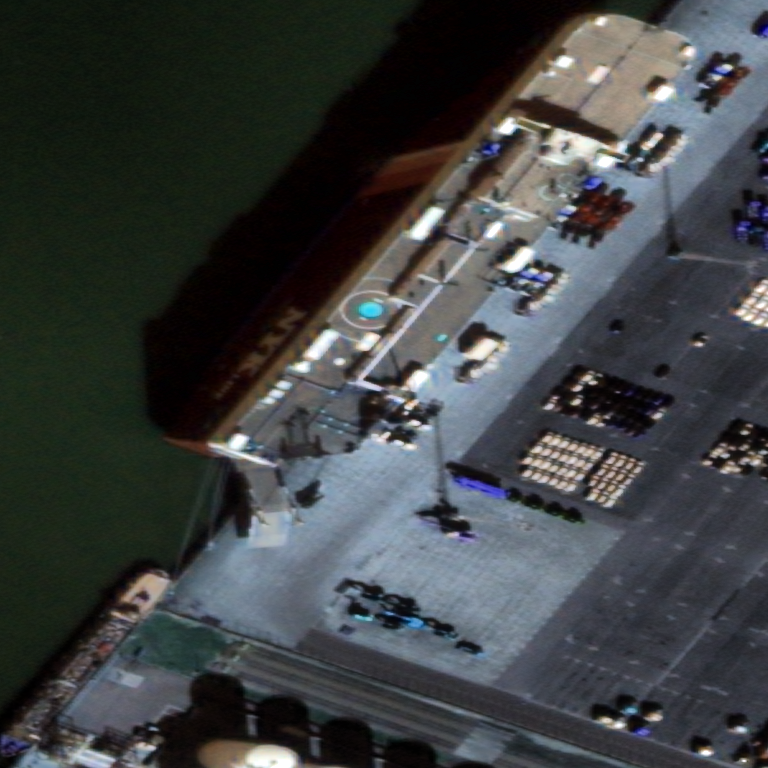

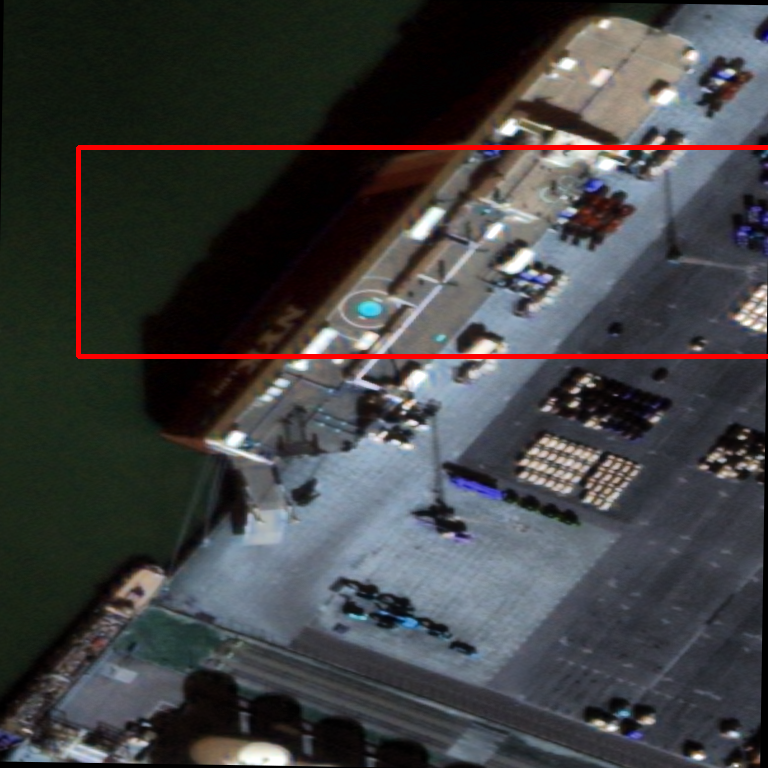

[84.09529] [151.55359] [52.016994] [265.64435] [-0.85065174]
a
84.09529 151.55359 52.016994 265.64435 -0.85065174
-48.72688293457031 125.54509162902832 216.91746520996094 177.56208610534668


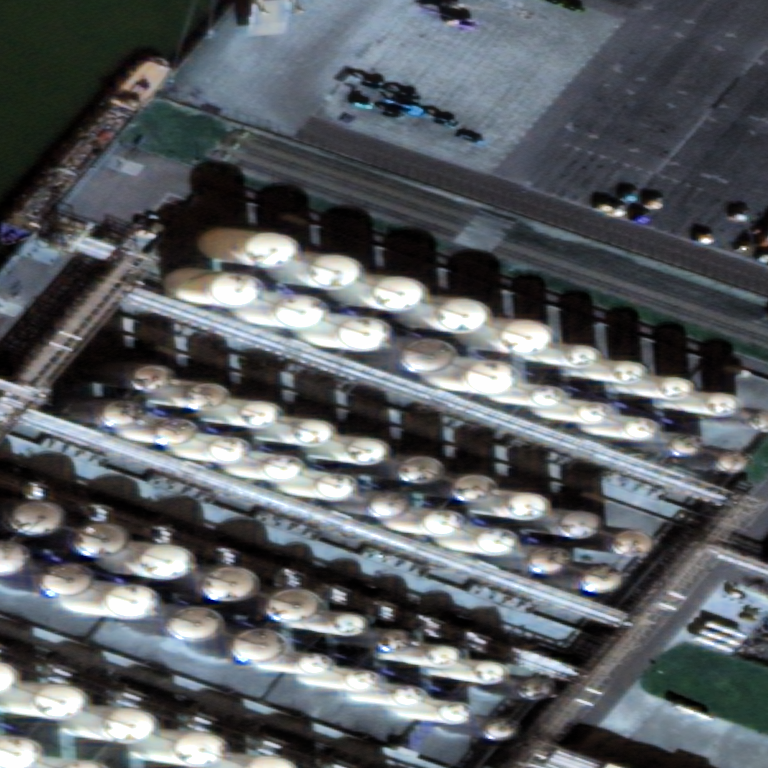

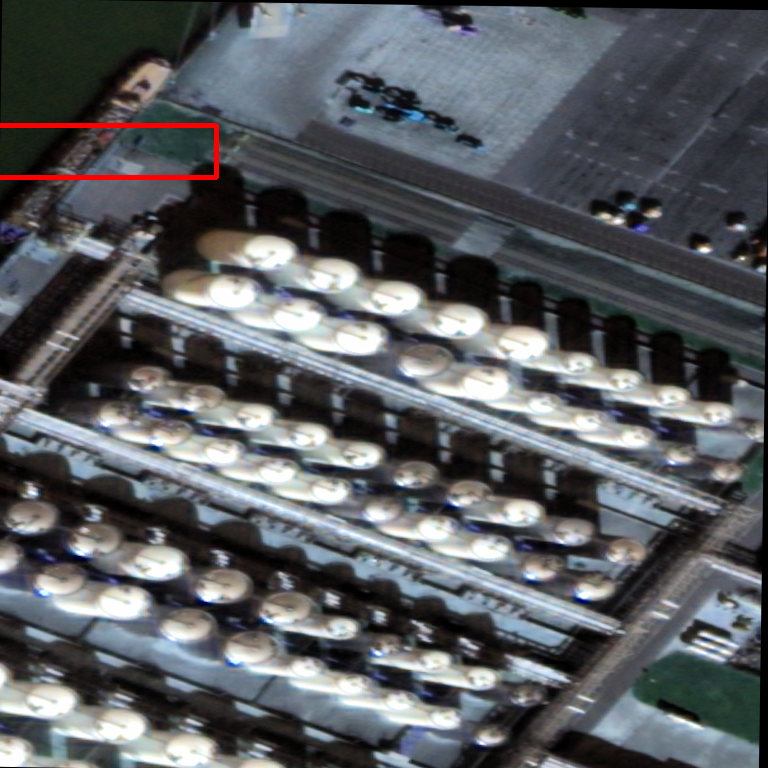

[682.7687] [591.75806] [51.81198] [415.33115] [0.2312536]
a
682.7687 591.75806 51.81198 415.33115 0.2312536
475.1031036376953 565.8520660400391 890.4342498779297 617.6640472412109


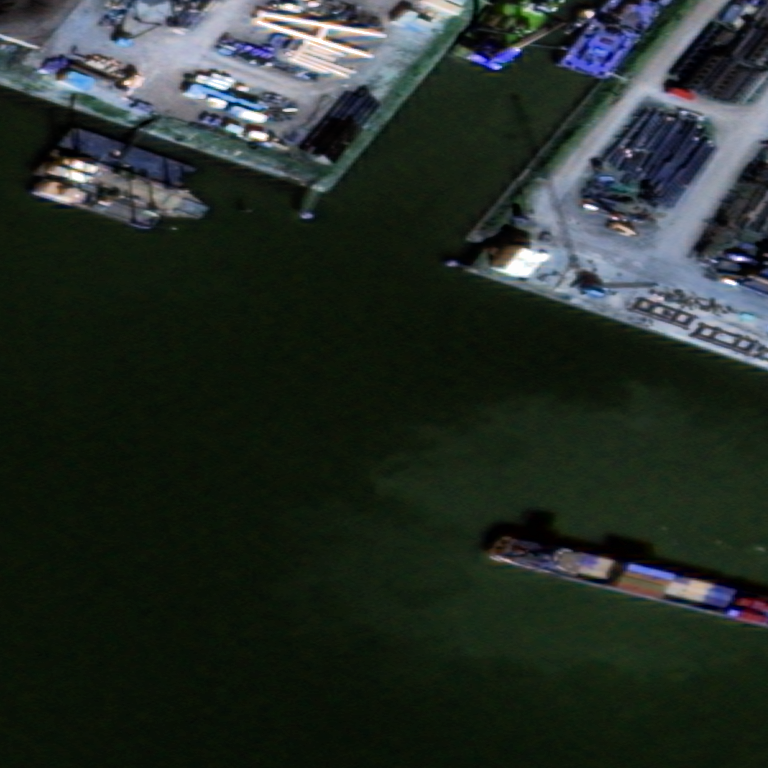

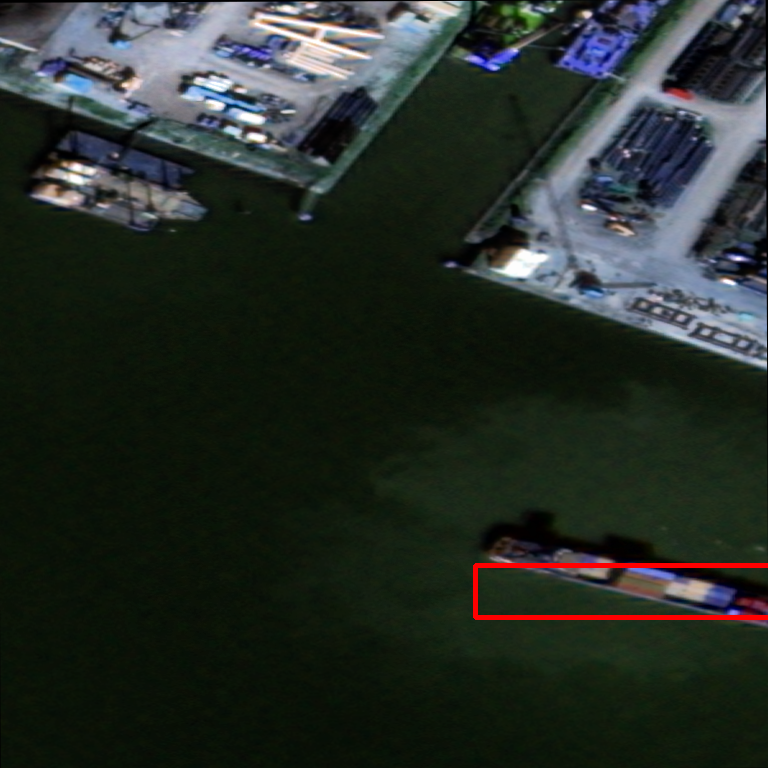

[170.76868] [591.75806] [51.81198] [415.33115] [0.2312536]
a
170.76868 591.75806 51.81198 415.33115 0.2312536
-36.89689636230469 565.8520660400391 378.4342498779297 617.6640472412109


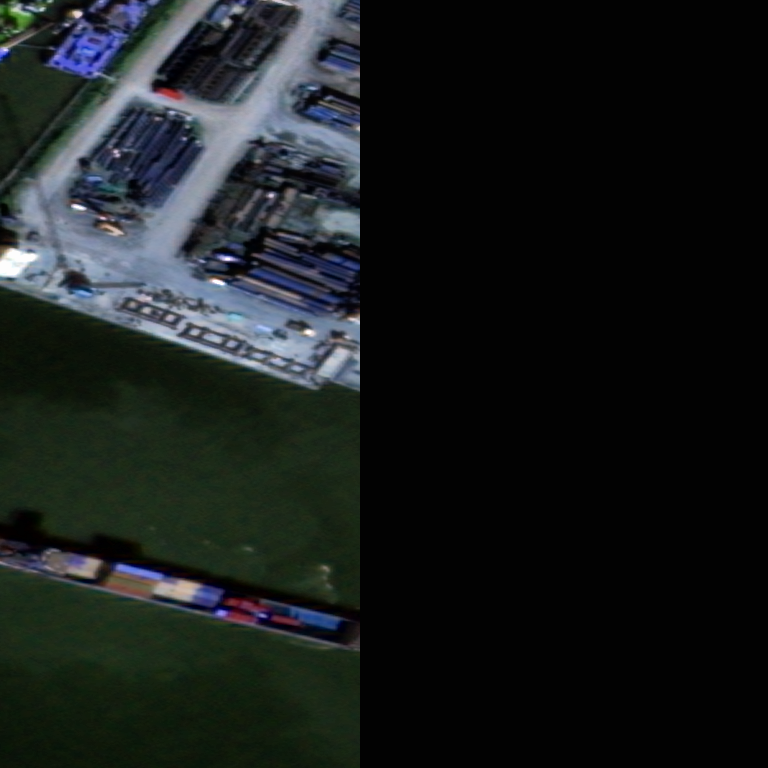

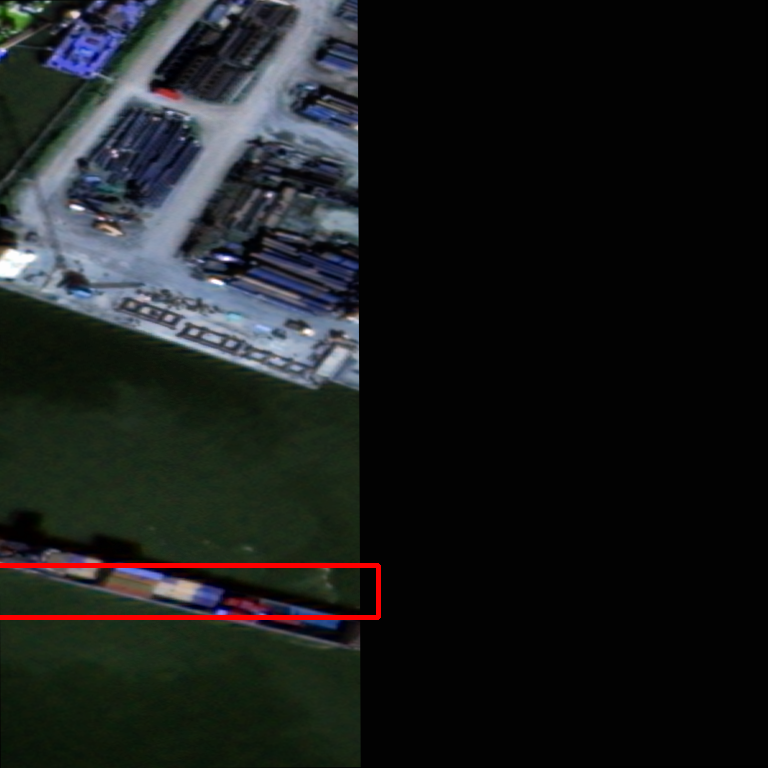

In [32]:

i=0
try:
    while True:
        if 4 == i: break
        image_features = sess.run(next_element)

        cxv = image_features['image/object/rbbox/cx'].values
        cyv = image_features['image/object/rbbox/cy'].values
        hv = image_features['image/object/rbbox/h'].values
        wv = image_features['image/object/rbbox/w'].values
        angv = image_features['image/object/rbbox/ang'].values
        print(cxv, cyv, hv, wv, angv)
        print("a")
        encoded_jpg_io = io.BytesIO(image_features['image/encoded'])
        image = np.array(Image.open(encoded_jpg_io))
        
        for cx, cy, h, w, ang in zip(cxv, cyv, hv, wv, angv):
            print(cx, cy, h, w, ang)
            x1, y1, x2, y2 = cx-(w/2), cy-(h/2), cx+(w/2), cy+(h/2)
            print(x1, y1, x2, y2)
            x1, y1, x2, y2 = int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item())
            cv2_imshow(image)
            matrix = cv2.getRotationMatrix2D((cx, cy), ang, 1)
            mimage = cv2.warpAffine(image, matrix, (image.shape[0], image.shape[1]))
            
            cv2.rectangle(mimage, (x1, y1),  (x2, y2), (0, 0, 255), 3)

            cv2_imshow(mimage)

        i+=1
except tf.errors.OutOfRangeError:
    pass


In [0]:
cyv

array([0.7839343 , 0.11700058], dtype=float32)

In [0]:
ang.values

array([0.30098236], dtype=float32)